# Parameters




Parameters are shown in papers linked below.

1. [Durstewitz et. al., 2000 ](https://papers.cnl.salk.edu/PDFs/Dopamine-Mediated%20Stabilization%20of%20Delay-Period%20Activity%20in%20a%20Network%20Model%20of%20Prefrontal%20Cortex%202000-3711.pdf)
(Synaptic conductance; 근데 밑에 class 제작할 때는 2002 논문 parameter 사용?)

2. [Durstewitz et. al., 2002](https://www.bio.psy.ruhr-uni-bochum.de/bpsy/mam/content/documents/durstewitz_2002_the_computational_role_of_dopamine_d1.pdf)
(Morphology ~ Ionic conductance)

3. [Otani. et al, 2011](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=3f57d0ce041ff40785912241a47c9e9d2a528bba) (+0.001 term in soma_IKS, desired peak conductance)

4. [Tsodyks, M. V., & Markram, H. (1997)](https://www.pnas.org/doi/pdf/10.1073/pnas.94.2.719), [Durstewitz, D., & Gabriel, T. (2007)](https://academic.oup.com/cercor/article-abstract/17/4/894/377757) (utilization of synaptic efficacy (USE) & recovery time)

In [1]:
### Morphology ###

soma_l = 28.62
soma_d = 21.84

dend_l = 650
dend_d = 6.5

### Passive properties ###

soma_Rm = 30000     # membrane resistance
soma_Eleak = -70    # leakage reversal potential
soma_Cm = 1.2       # membrane capacitance
soma_Ri = 150       # axial resistance

dend_Rm = soma_Rm / 1.92
dend_Eleak = -70
dend_Cm = soma_Cm * 1.92 
dend_Ri = 150

### Ionic conductances ###

soma_INa = 0.117      # Na+ current
soma_INaP = 0.0018     # persistent Na+ current
soma_IDR = 0.05       # delayed rectifier current
soma_IKS = 8e-5 + 0.001     # slowly inactivating K+ current
soma_IC = 0.0021       # voltage-dependent C-type K+ current
soma_IHVA = 0.0004     # high-voltage-activated Ca2+ current

dend_INa = 0.02
dend_INaP = 0.0008
dend_IDR = 0.014
dend_IKS = soma_IKS
dend_IC = soma_IC
dend_IHVA = 0.0008

CAF = 600e-9   # calcium accumulation factor

### Plasticity parameters ###

ampa_tau1 = 0.55  # ms
ampa_tau2 = 2.2   # ms

nmda_taus = 0.1
nmda_tau1 = 10.6   # ms
nmda_tau2 = 285.0  # ms

### Desired peak conductances

g_AMPA_max = 4e-9   # S/cm2
g_NMDA_max = g_AMPA_max / 50    # S/cm2

USE = 0.6       # STD utilization parameter 
t_rec = 800     # recovery time (ms)


# Import Libraries

In [2]:
from neuron import h
import numpy as np
import matplotlib.pyplot as plt
from neuron.units import ms, mV, µm
from matplotlib.gridspec import GridSpec

In [3]:
h.load_file('stdrun.hoc')

### load ionic conductances ###

h.nrn_load_dll("./mods/arm64/.libs/libnrnmech.so")
# mechanisms = ['hh', 'kdr', 'iks', 'hva', 'ic', 'cadyn']
mechanisms = ['naf', 'nap', 'hva','kdr', 'iks', 'hva', 'ic', 'cadyn', 'kdyn']

# Generate Two-Compartment Model Neuron

In [4]:
### Create a soma ###

soma = h.Section(name='soma')

### Add morphology ###

soma.L = soma_l
soma.diam = soma_d

### Add passive properties ###

soma.insert('pas')
soma.g_pas = 1 / soma_Rm
soma.e_pas = soma_Eleak
soma.Ra = soma_Ri
soma.cm = soma_Cm

### Add ionic conductances ###

for i in mechanisms:
    soma.insert(i)

soma(0.5).nap.gnapbar = soma_INaP
soma(0.5).naf.gnafbar = soma_INa
soma(0.5).hva.ghvabar = soma_IHVA
soma(0.5).kdr.gkdrbar = soma_IDR
soma(0.5).iks.gKsbar = soma_IKS
soma(0.5).ic.gkcbar = soma_IC
soma(0.5).cadyn.CAF = CAF

In [5]:
### Create a dendrite ###

dend = h.Section(name='dend')

### Add morphology ###

dend.L = dend_l
dend.diam = dend_d

### Add passive properties ###

dend.insert('pas')  # Passive dendrite
dend.g_pas = 1 / dend_Rm
dend.e_pas = dend_Eleak
dend.Ra = dend_Ri
dend.cm = dend_Cm

# Add ionic conductances

for i in mechanisms:
    dend.insert(i)

dend(0.5).nap.gnapbar = dend_INaP
dend(0.5).naf.gnafbar = dend_INa
dend(0.5).hva.ghvabar = dend_IHVA
dend(0.5).kdr.gkdrbar = dend_IDR
dend(0.5).iks.gKsbar = dend_IKS
dend(0.5).ic.gkcbar = dend_IC
dend(0.5).cadyn.CAF = CAF

### Connect soma and dendrite ###
dend.connect(soma)

dend

In [6]:
h.topology()


|-|       soma(0-1)
   `|       dend(0-1)



1.0

# Checking Ionic Currents

In [7]:
# Stimulation condition
stim = h.IClamp(dend(0.5))
stim.delay = 10
stim.dur = 500
stim.amp = 0.4

In [8]:
print(dir(soma(0.5)))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'area', 'ca_ion', 'cadyn', 'cm', 'diam', 'hva', 'ic', 'iks', 'k_ion', 'kdr', 'kdyn', 'na_ion', 'naf', 'nap', 'node_index', 'pas', 'point_processes', 'ri', 'sec', 'v', 'volume', 'x']


In [9]:
# Time & Voltage recording

t = h.Vector().record(h._ref_t)
dend_v = h.Vector().record(dend(0.5)._ref_v)
soma_v =  h.Vector().record(soma(0.5)._ref_v)


In [10]:
# Soma recording
soma_ina_vec = h.Vector().record(soma(0.5).na_ion._ref_ina)
soma_ena_vec = h.Vector().record(soma(0.5).na_ion._ref_ena)
soma_nai_vec = h.Vector().record(soma(0.5).na_ion._ref_nai)
soma_nao_vec = h.Vector().record(soma(0.5).na_ion._ref_nao)

soma_ik_vec = h.Vector().record(soma(0.5).k_ion._ref_ik)
soma_ki_vec = h.Vector().record(soma(0.5).k_ion._ref_ki)
soma_ek_vec = h.Vector().record(soma(0.5).k_ion._ref_ek)

soma_cai_vec = h.Vector().record(soma(0.5).ca_ion._ref_cai)
soma_cao_vec = h.Vector().record(soma(0.5).ca_ion._ref_cao)
soma_ica_vec = h.Vector().record(soma(0.5).ca_ion._ref_ica)
soma_eca_vec = h.Vector().record(soma(0.5).ca_ion._ref_eca)

# Dendrite
dend_ina_vec = h.Vector().record(dend(0.5).na_ion._ref_ina)
dend_ena_vec = h.Vector().record(dend(0.5).na_ion._ref_ena)
dend_nai_vec = h.Vector().record(dend(0.5).na_ion._ref_nai)
dend_nao_vec = h.Vector().record(dend(0.5).na_ion._ref_nao)

dend_ik_vec = h.Vector().record(dend(0.5).k_ion._ref_ik)
dend_ki_vec = h.Vector().record(dend(0.5).k_ion._ref_ki)
dend_ek_vec = h.Vector().record(dend(0.5).k_ion._ref_ek)

dend_cai_vec = h.Vector().record(dend(0.5).ca_ion._ref_cai)
dend_cao_vec = h.Vector().record(dend(0.5).ca_ion._ref_cao)
dend_ica_vec = h.Vector().record(dend(0.5).ca_ion._ref_ica)
dend_eca_vec = h.Vector().record(dend(0.5).ca_ion._ref_eca)


In [11]:
# mechanisms
nap = soma(0.5).nap
naf = soma(0.5).naf
iks = soma(0.5).iks
hva = soma(0.5).hva
kdr = soma(0.5).kdr
ic = soma(0.5).ic

naf_m_vec = h.Vector().record(naf._ref_m)
naf_h_vec = h.Vector().record(naf._ref_h)
naf_g_vec = h.Vector().record(naf._ref_gna)

nap_m_vec = h.Vector().record(nap._ref_m)
nap_h_vec = h.Vector().record(nap._ref_h)
nap_g_vec = h.Vector().record(nap._ref_gna)

hva_u_vec = h.Vector().record(hva._ref_u)
hva_z_vec = h.Vector().record(hva._ref_z)
hva_g_vec = h.Vector().record(hva._ref_gca)

kdr_n_vec = h.Vector().record(kdr._ref_n)
kdr_g_vec = h.Vector().record(kdr._ref_gk)

iks_a_vec = h.Vector().record(iks._ref_a)
iks_b_vec = h.Vector().record(iks._ref_b)
iks_g_vec = h.Vector().record(iks._ref_gk)

ic_c_vec = h.Vector().record(ic._ref_c)
ic_g_vec = h.Vector().record(ic._ref_gk)


In [12]:
# Run simulation

h.finitialize(-65 * mV)
h.continuerun(800 * ms)

0.0

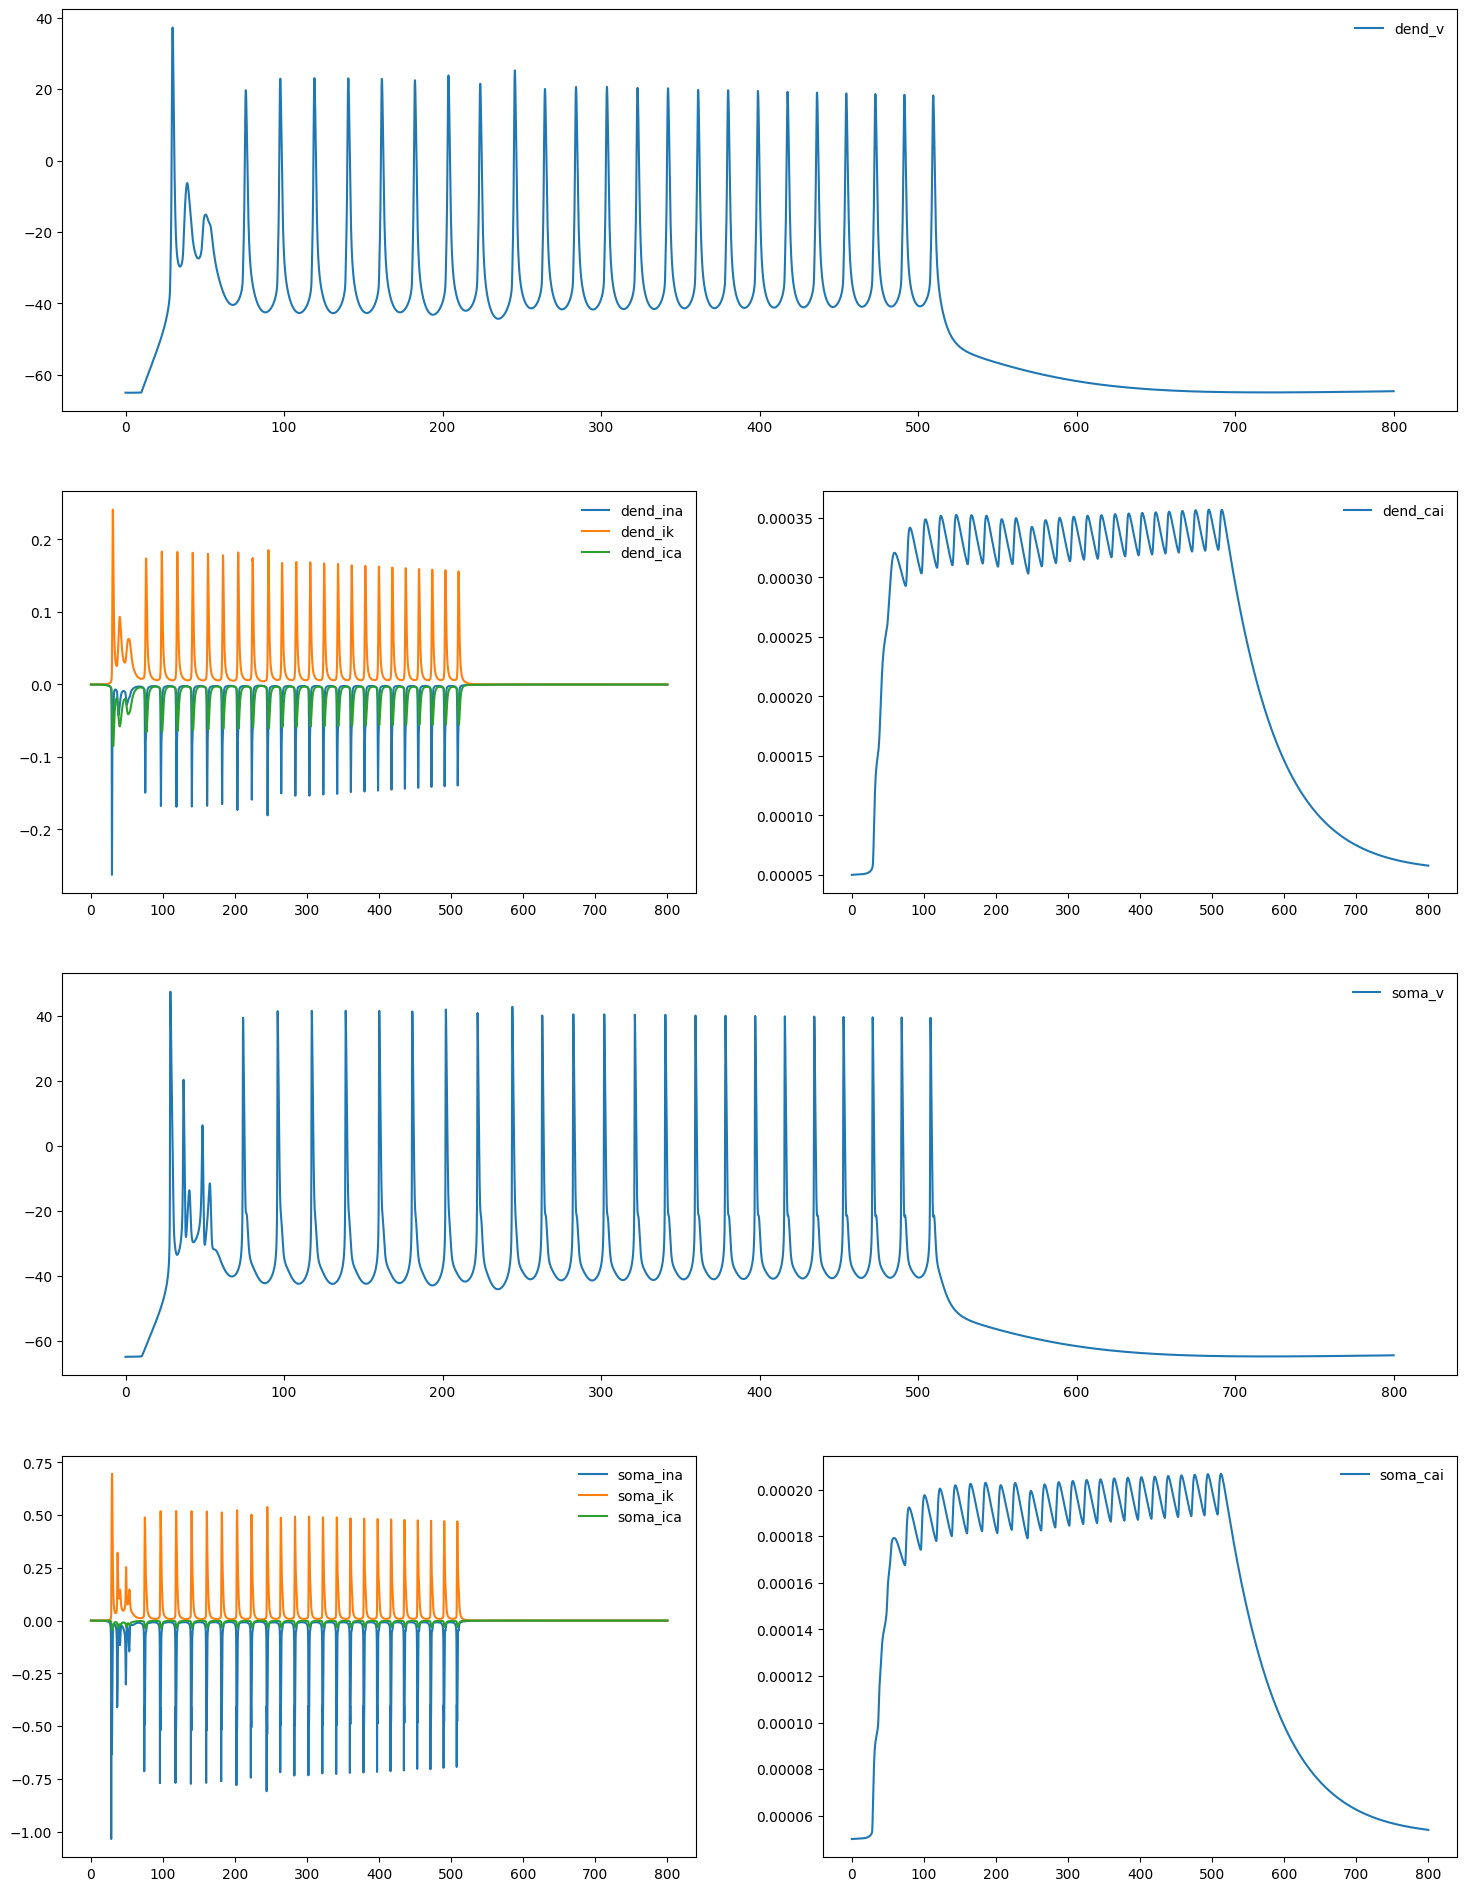

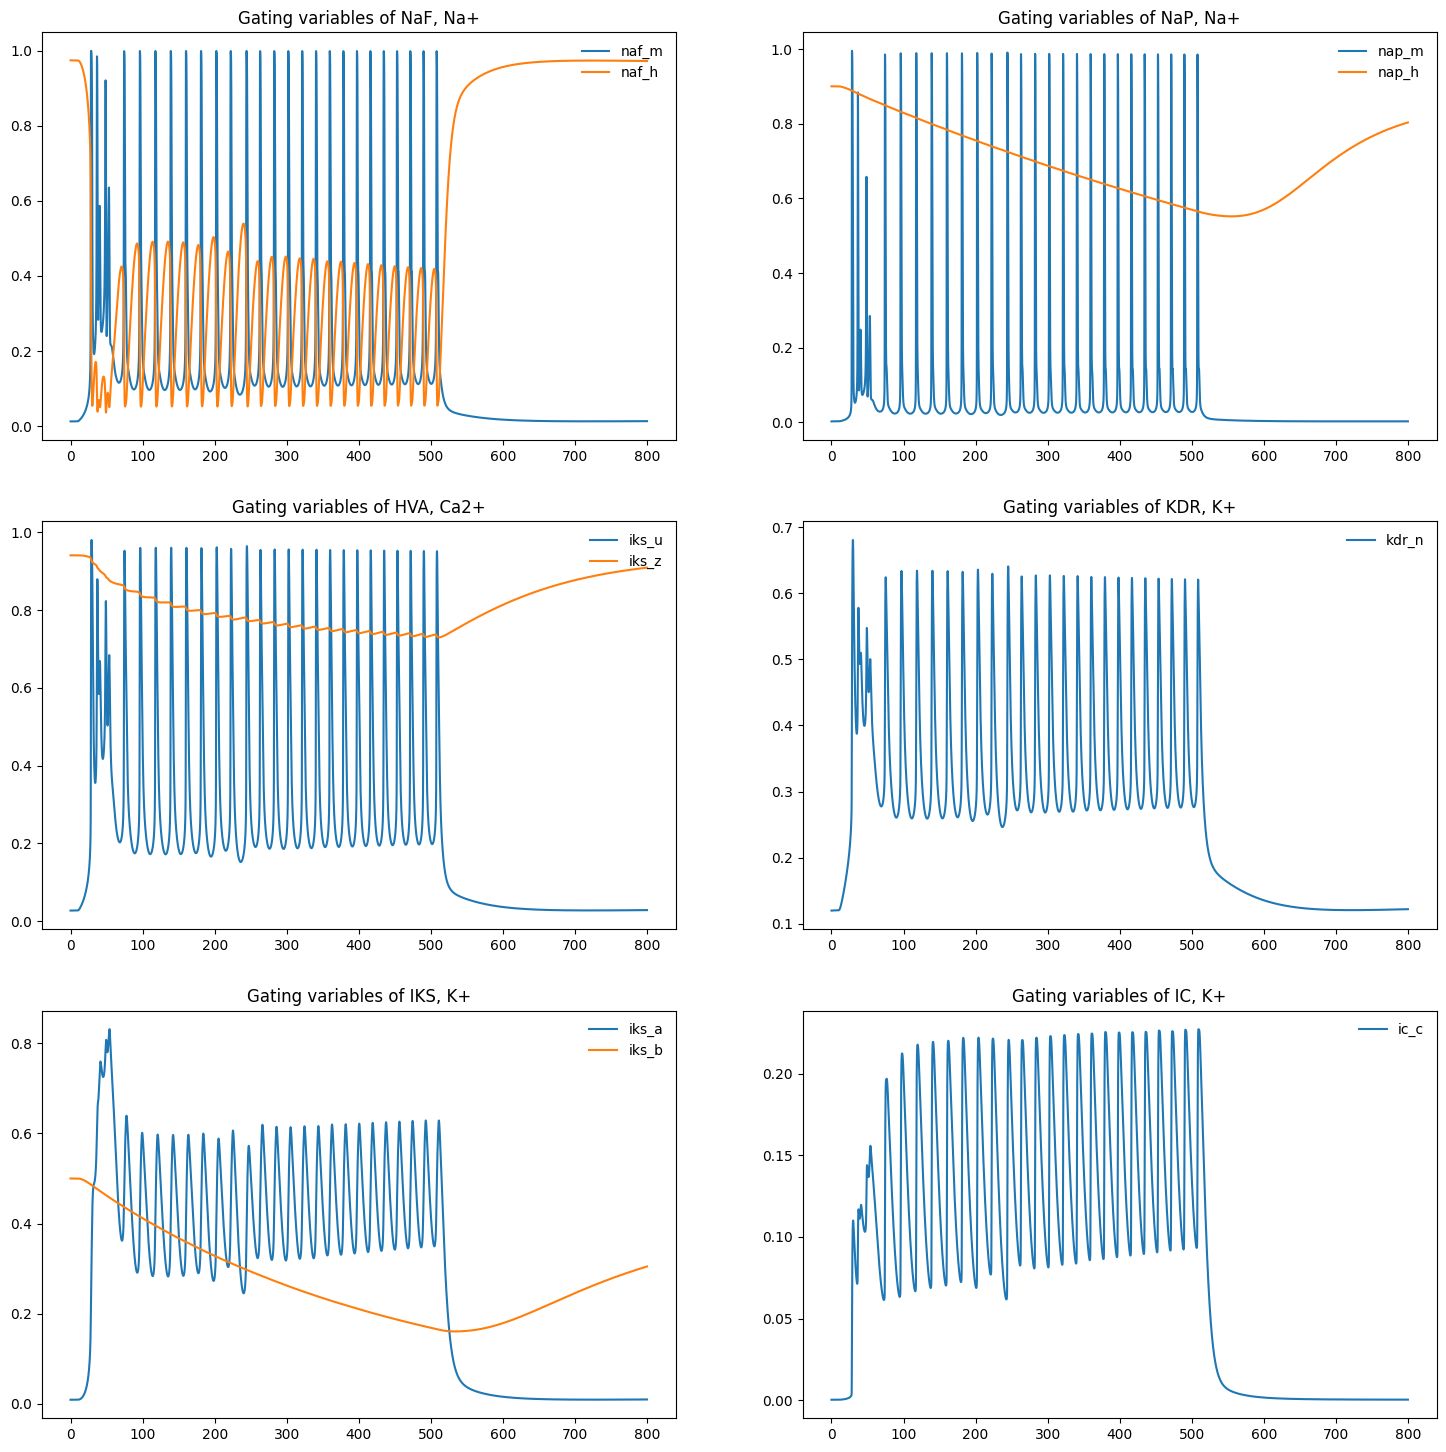

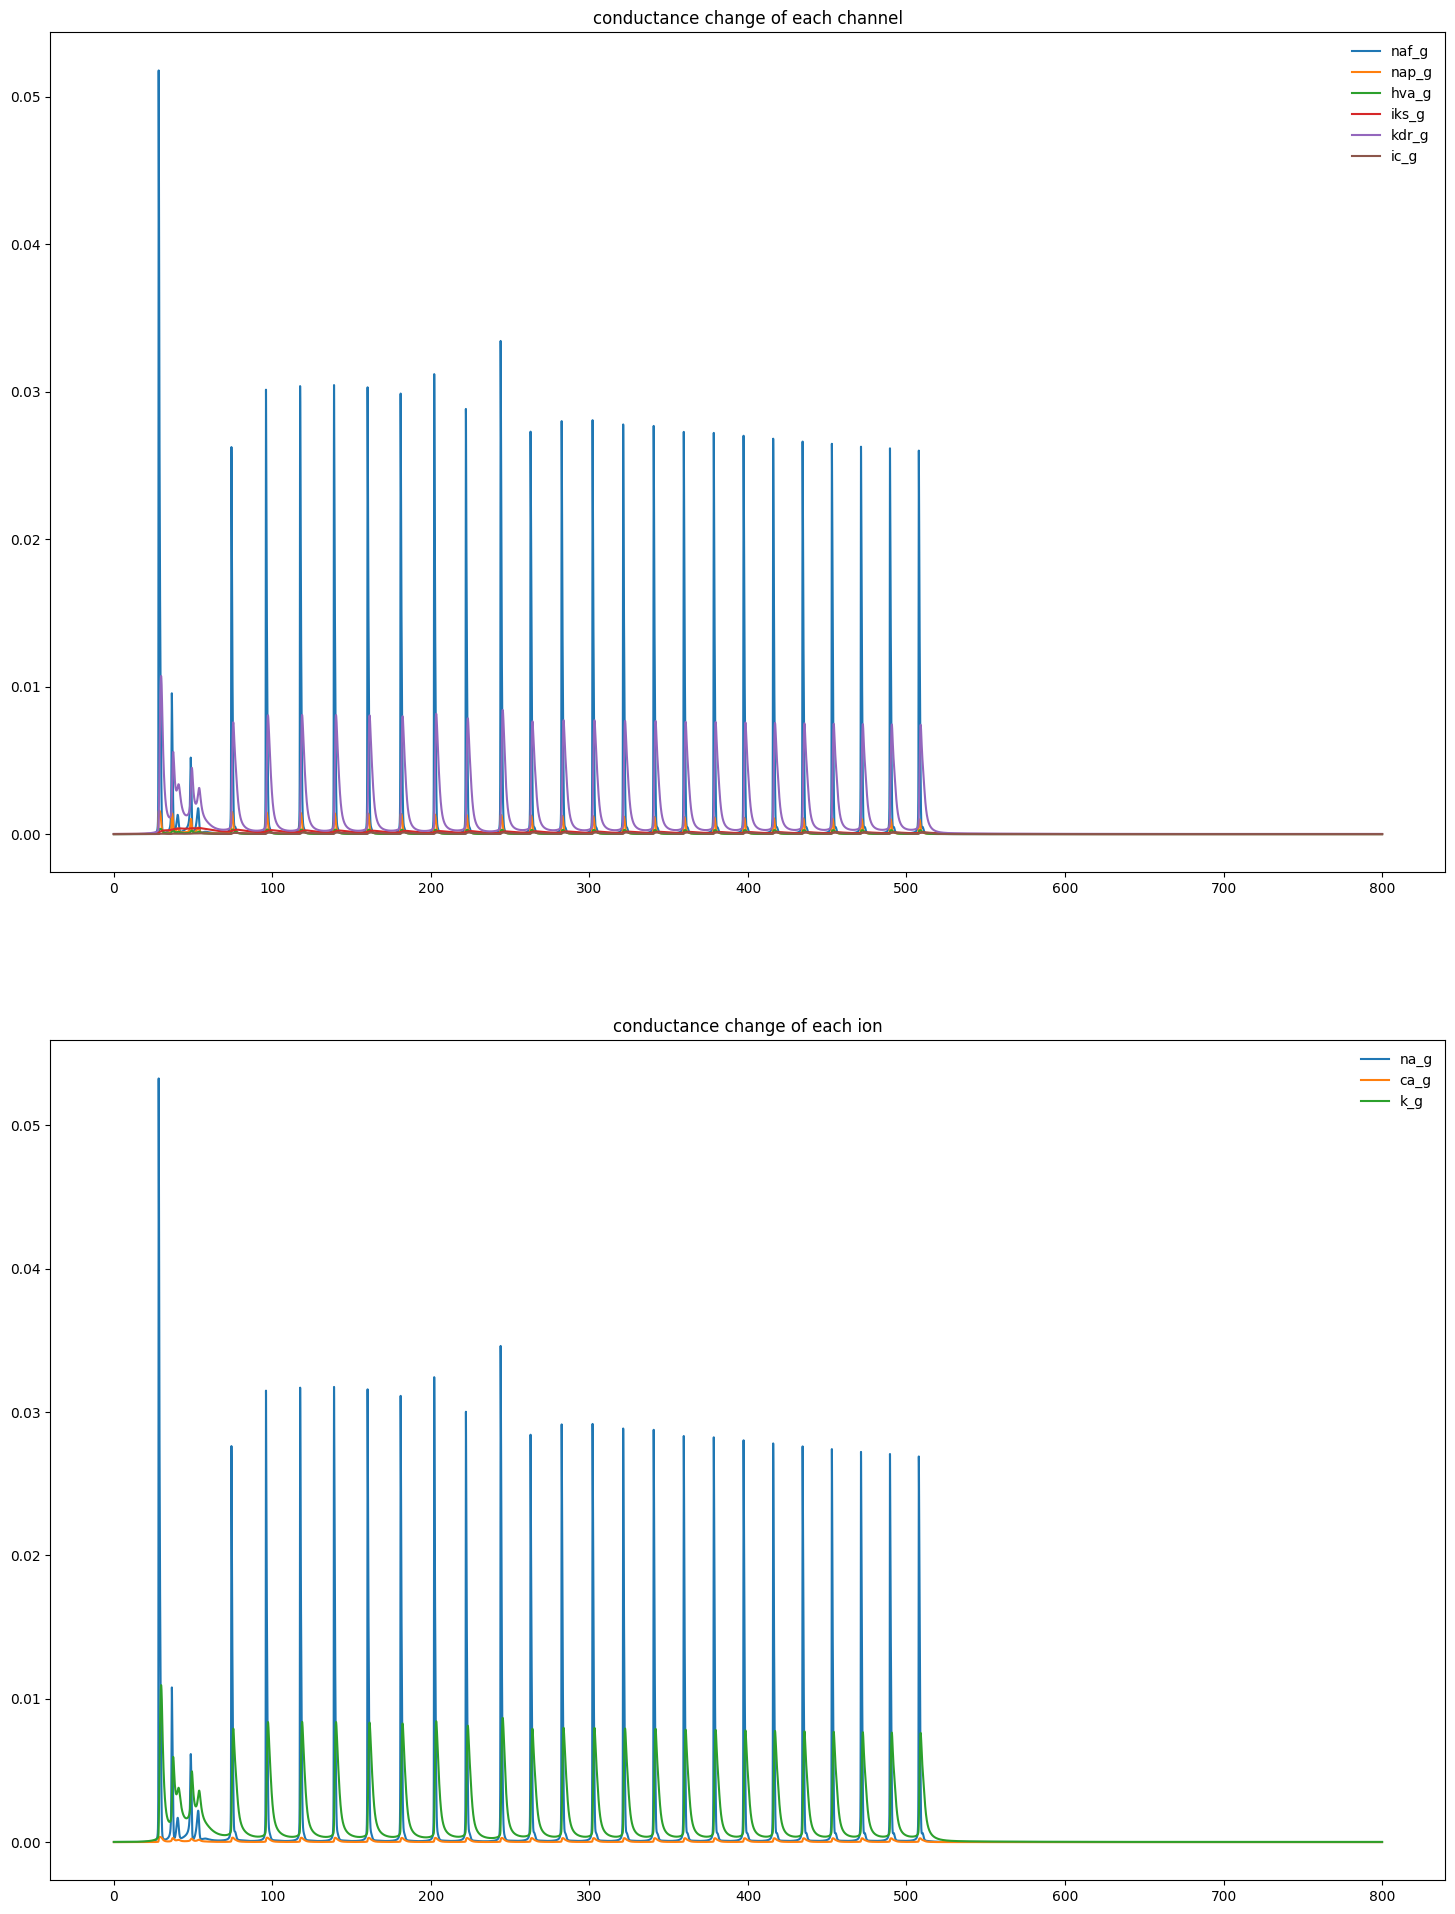

In [13]:

plt.figure(figsize=(18,24))

gs1=GridSpec(4,2)

plt.subplot(gs1[0,:])
plt.plot(t, dend_v, label='dend_v')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs1[1,0])
plt.plot(t, dend_ina_vec, label='dend_ina')
plt.plot(t, dend_ik_vec, label='dend_ik')
plt.plot(t, dend_ica_vec, label='dend_ica')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs1[1,1])
plt.plot(t, dend_cai_vec, label='dend_cai')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs1[2,:])
plt.plot(t, soma_v, label='soma_v')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs1[3,0])
plt.plot(t, soma_ina_vec, label='soma_ina')
plt.plot(t, soma_ik_vec, label='soma_ik')
plt.plot(t, soma_ica_vec, label='soma_ica')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)  

plt.subplot(gs1[3,1])
plt.plot(t, soma_cai_vec, label='soma_cai')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# fig.tight_layout(pad=1.0)

# fig1=plt.gcf()
# fig1.savefig('./votage_current_plot.png', dpi=100)

gs2=GridSpec(3,2)
plt.figure(figsize=(18,18))

# Gating variables in soma(0.5)
plt.subplot(gs2[0,0])
plt.title("Gating variables of NaF, Na+")
plt.plot(t, naf_m_vec, label='naf_m')
plt.plot(t, naf_h_vec, label='naf_h')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs2[0,1])
plt.title("Gating variables of NaP, Na+")
plt.plot(t, nap_m_vec, label='nap_m')
plt.plot(t, nap_h_vec, label='nap_h')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs2[1,0])
plt.title("Gating variables of HVA, Ca2+")
plt.plot(t, hva_u_vec, label='iks_u')
plt.plot(t, hva_z_vec, label='iks_z')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs2[1,1])
plt.title("Gating variables of KDR, K+")
plt.plot(t, kdr_n_vec, label='kdr_n')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs2[2,0])
plt.title("Gating variables of IKS, K+")
plt.plot(t, iks_a_vec, label='iks_a')
plt.plot(t, iks_b_vec, label='iks_b')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs2[2,1])
plt.title("Gating variables of IC, K+")
plt.plot(t, ic_c_vec, label='ic_c')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# fig.tight_layout(pad=1.0)

# fig2=plt.gcf()
# fig2.savefig('./gating_variables_plot.png', dpi=100)

gs3=GridSpec(2,1)
plt.figure(figsize=(18,24))

plt.subplot(gs3[0,:])
plt.title("conductance change of each channel")
plt.plot(t, naf_g_vec, label='naf_g')
plt.plot(t, nap_g_vec, label='nap_g')
plt.plot(t, hva_g_vec, label='hva_g')
plt.plot(t, iks_g_vec, label='iks_g')
plt.plot(t, kdr_g_vec, label='kdr_g')
plt.plot(t, ic_g_vec, label='ic_g')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

plt.subplot(gs3[1,:])
plt.title("conductance change of each ion")
plt.plot(t, naf_g_vec+nap_g_vec, label='na_g')
plt.plot(t, hva_g_vec, label='ca_g')
plt.plot(t, iks_g_vec+kdr_g_vec+ic_g_vec, label='k_g')
plt.legend(loc='upper right',fontsize=10, framealpha=0.0)
# fig3=plt.gcf()
# fig3.savefig('./conductance_plot.png', dpi=100)

# Create Synapses

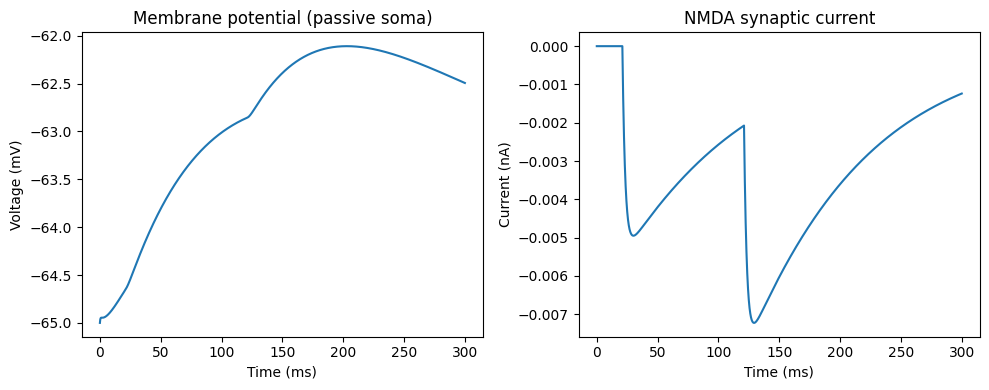

In [ ]:
# Insert your NMDA synapse
syn = h.nmda(dend(0.5))
syn.tau1 = 2.3
syn.tau2 = 95.0
syn.gmax = 0.001  # uS
syn.e = 0  # mV

# Stimulate it with NetStim + NetCon
stim = h.NetStim()
stim.start = 20  # ms
stim.number = 2
stim.interval = 100
stim.noise = 0

nc = h.NetCon(stim, syn)  # weight is fixed inside mod file

# Record membrane voltage and synaptic current
v = h.Vector().record(soma(0.5)._ref_v)
i = h.Vector().record(syn._ref_i)
t = h.Vector().record(h._ref_t)

# Run simulation
h.finitialize(-65)
h.continuerun(300)

# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, v)
plt.title("Membrane potential (passive soma)")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

plt.subplot(1, 2, 2)
plt.plot(t, i)
plt.title("NMDA synaptic current")
plt.xlabel("Time (ms)")
plt.ylabel("Current (nA)")

plt.tight_layout()
plt.show()

0.700375
0.49089967187499994
0.3444502330996093
0.24206376921576434
0.17048283265297123
0.12043881037850851
0.08545178330587476
0.060991478003719686
0.043890667059350526
0.031935062607868436
0.023576600645726017
0.0177329909264432
0.013647577281449602
0.010791362466893453
0.008794511284666885
0.007398462701892736
0.006422450236460759
0.005740095521565627
0.005263044281514569
0.004929525833313873
0.004696354748215561
0.004533339013346204
0.004419370637705665
0.004339692497085973
0.004283987517025231
0.004245042772840265
0.00421781552856195
0.0041987802814058735
0.0041854722642378816
0.004176168296735309
0.004169663660455073
0.004165116106615653
0.004161936798037668
0.004159714063928084
0.0041581600949437214
0.004157073676377529
0.00415631413399744
0.00415578311893096
0.004155411873022608
0.00415515232572693
0.00415497086972384
0.004154844009295679
0.004154755317998841
0.00415469331169594
0.0041546499615394234
0.004154619654361249
0.004154598465855308
0.004154583652441092
0.0041545732960

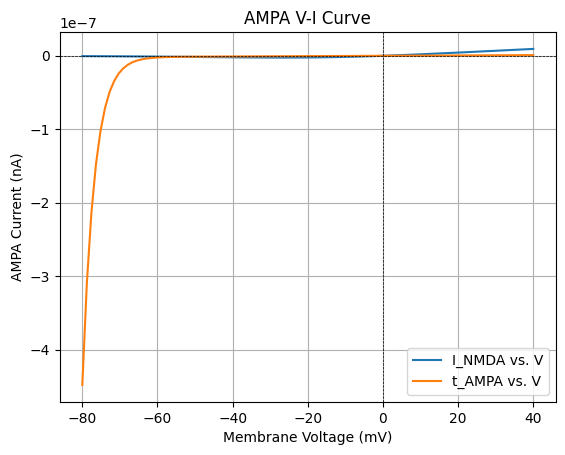

In [16]:
from neuron import h

class Synapse:
    def __init__(self, sec, weight=1.0):
        
        # Create AMPA synapse
        self.ampa = h.Exp2Syn(sec)
        self.ampa.tau1 = 0.2  # AMPA time constant 1 (ms)
        self.ampa.tau2 = 1.0  # AMPA time constant 2 (ms)
        self.ampa.e = 0.0  # AMPA reversal potential (mV)
        self.ampa_g_max = 4e-9
        
        # Create NMDA synapse
        self.nmda = h.Exp2Syn(sec)
        self.nmda.tau1 = 2.3  # NMDA time constant 1 (ms)
        self.nmda.tau2 = 95.0  # NMDA time constant 2 (ms)
        self.nmda.e = 0.0  # NMDA reversal potential (mV)
        self.nmda_g_max = 4e-9 / 50

        # Weight parameters
        self.ampa_weight = weight
        self.nmda_weight = 1.0  # Fixed efficacy for NMDA
        
        # Short-term depression parameters
        self.use = 0.3  # Utilization parameter
        self.t_rec = 800  # Recovery time constant (ms)
        self.residual_depression = 1.0  # Tracks depression state
        
        # Voltage-dependent NMDA gating from Mel (1993)
        self.tau_s = 0.1  # Time constant for Mg²⁺ block kinetics
        
    def nmda_gating(self, v):
        
        # voltage-dependent Mg2+ gating
        return 1.50265 / (1 + 0.33 * h.exp(-0.06 * v))
    
    def update_ampa(self, presynaptic_input, v):
        
        # Update AMPA conductance with plasticity and short-term depression
        self.residual_depression *= (1 - self.use)  # Apply depression
        self.ampa_g = self.ampa_g_max *  self.ampa_weight * presynaptic_input * self.residual_depression
        self.ampa_current = self.ampa_g * (v - self.ampa.e) 
    
    def update_nmda(self, presynaptic_input, v):
        
        # Update NMDA conductance with voltage-dependent gating and compute current
        mg_block = self.nmda_gating(v)
        self.nmda_g = self.nmda_weight * mg_block * presynaptic_input
        self.nmda_current = self.nmda_g_max * self.nmda_g * (v - self.nmda.e)  # I_NMDA = g_NMDA * s(V) * (V - E_NMDA)
    
    def recover_depression(self, dt):
        """Recover synaptic depression over time."""
        self.residual_depression += (1.0 - self.residual_depression) * (dt / self.t_rec)
        print(self.residual_depression)
    
    def update(self, presynaptic_input, v, dt):
        """Update both AMPA and NMDA conductances, including short-term depression recovery."""
        self.update_ampa(presynaptic_input, v)
        self.update_nmda(presynaptic_input, v)
        self.recover_depression(dt)

# Example usage
syn = Synapse(dend(0.5))

# syn.update(2.0, -65, 1.0)  # Example presynaptic input of 1.0, Vm=-65 mV, timestep dt=1.0 ms
# print(f"NMDA Conductance: {syn.nmda_g}, NMDA Current: {syn.nmda_current}")

# Define voltage range from -80 mV to +40 mV
voltages = np.linspace(-80, 40, 100)  # 100 points between -80 and 40 mV
nmda_currents = []
ampa_currents = []

# Loop through voltage values and compute AMPA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
     # AMPA current calculation
    nmda_currents.append(syn.nmda_current)
    ampa_currents.append(syn.ampa_current)


# Plot V-I curve
plt.plot(voltages, nmda_currents, label="I_NMDA vs. V")
plt.plot(voltages, ampa_currents, label="t_AMPA vs. V")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero current reference
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Zero voltage reference
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("AMPA Current (nA)")
plt.title("AMPA V-I Curve")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import numpy as np

class NMDASynapse:
    def __init__(self, sec, weight=1.0):
        self.sec = sec
        self.loc = sec(0.5)
        self.nmda_g_max = 4e-9 / 50  # max conductance
        self.nmda_weight = weight

        # Time constants
        self.tau1 = 2.3
        self.tau2 = 95.0

        self.e_rev = 0.0
        self.use = 0.6
        self.t_rec = 800.0  # ms
        self.tau_s = 0.1

        self.spike_times = [0]  # times of presynaptic activation

        self.g_nmda_vec = []  # store conductance for plotting/debug
        self.i_nmda_vec = []  # store current for plotting/debug
        self.v_nmda_vec = []  # store voltage for plotting/debug
        self.time_vec = []

    def nmda_gating(self, v):
        return 1.50265 / (1 + 0.33 * np.exp(-0.0625 * v))

    def activate(self, t_spike):

        self.spike_times.append(t_spike)
        print(self.spike_times)

    def compute_g(self, t):
        g_total = 0
        for t0 in self.spike_times:
            if t >= t0:
                dt = t - t0
                g = self.nmda_weight * (np.exp(-dt / self.tau2) - np.exp(-dt / self.tau1))
                g_total += max(g, 0)
        return g_total

    def update(self, t, v):
        g = self.compute_g(t)
        mg_block = self.nmda_gating(v)
        i_nmda = self.nmda_g_max * g * mg_block * (v - self.e_rev)

        # Store for analysis
        self.g_nmda_vec.append(g)
        self.i_nmda_vec.append(i_nmda)
        self.time_vec.append(t)
        
        return self.i_nmda_vec, self.g_nmda_vec


/var/folders/pc/1x0npn6169d0rptly2f4km400000gn/T/ipykernel_80113/4117693886.py:42: RuntimeWarning: invalid value encountered in scalar divide
  v_nmda_vec.append(cur / conductance[i])


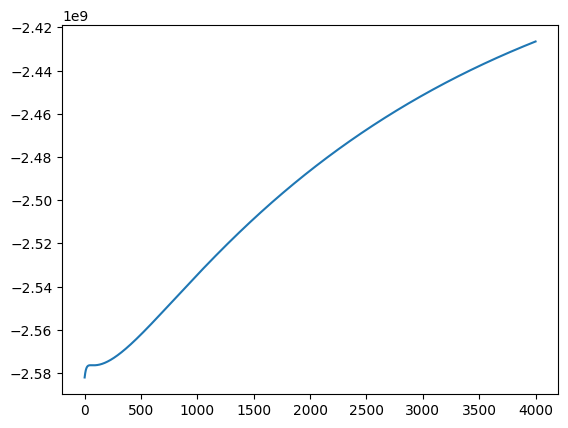

In [18]:
stim = h.IClamp(dend(0.5))

stim.delay = 100
stim.dur = 500
stim.amp = 0.4

syn = NMDASynapse(soma)

v_dend = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
t_dend = h.Vector().record(h._ref_t)

h.finitialize(-65 * mV)
h.continuerun(100 * ms)
# print(np.array(v_dend))

refractory_period = 2

for i, v in enumerate(np.array(v_dend)):
    
    spike_time = 0

    if v > 30:
        
        spike_time = np.array(t_dend)[i]
        
        if np.array(t_dend)[i] - syn.spike_times[-1] > refractory_period : 

            syn.activate(spike_time)

        
    conductance, current  = syn.update(np.array(t_dend)[i], v)
    
# v_soma = h.Vector().record(soma(0.5)._ref_v)
# t_soma = h.Vector().record(h._ref_t)

h.finitialize(-65 * mV)
h.continuerun(1000 * ms)

v_nmda_vec = []

for i, cur in enumerate(current):
    v_nmda_vec.append(cur / conductance[i])

# print(np.array(v_soma))

# # v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
# # t = h.Vector().record(h._ref_t)                     # Time stamp vector

plt.plot(v_nmda_vec ,  label="t_AMPA vs. V")
plt.show()

In [19]:
class NMDASynapse:
    def __init__(self, sec, weight=1.0):
        # Create NMDA synapse
        self.nmda = h.Exp2Syn(sec(0.5))
        self.nmda.tau1 = 2.3 * ms  # NMDA time constant 1 (ms)
        self.nmda.tau2 = 95.0 * ms  # NMDA time constant 2 (ms)
        self.nmda.e = 0.0 * mV  # NMDA reversal potential (mV)
        self.nmda_g_max = 4e-9 / 50
        
        # Weight parameters
        self.nmda_weight = 1.0  # Fixed efficacy for NMDA
        
        # Short-term depression parameters
        self.use = 0.6  # Utilization parameter
        self.t_rec = 800 * ms  # Recovery time constant (ms)
        # self.residual_depression = 1.0  # Tracks depression state

        # Voltage-dependent NMDA gating from Mel (1993)
        self.tau_s = 0.1  # Time constant for Mg²⁺ block kinetics
     
    def nmda_gating(self, v):
        
        # voltage-dependent Mg2+ gating
        return 1.50265 / (1 + 0.33 * h.exp(-0.0625 * v))
    
    def update_nmda(self, v, dt=1.0):
        
        # Update NMDA conductance with voltage-dependent gating and compute current
        mg_block = self.nmda_gating(v)
        self.nmda_g = self.nmda_weight * (np.exp(-dt / self.nmda.tau2) - np.exp(-dt / self.nmda.tau1))
        self.nmda_current = self.nmda_g_max * self.nmda_g * mg_block * (v - self.nmda.e)
        print(self.nmda_g)
        return self.nmda_current


0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999073508
0.3421234999

ValueError: x and y must have same first dimension, but have shapes (40001,) and (4001,)

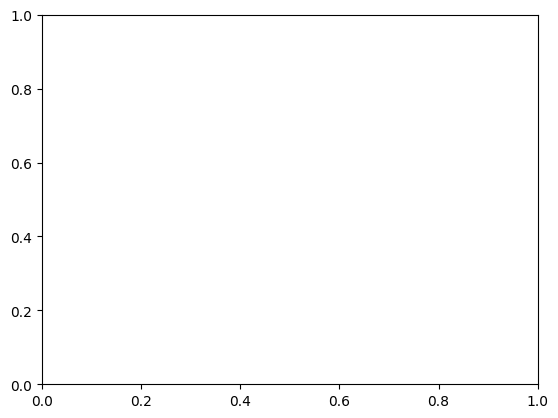

In [20]:
stim = h.IClamp(dend(0.5))

stim.delay = 2
stim.dur = 1
stim.amp = 2.0

syn = NMDASynapse(soma)

v_dend = h.Vector().record(dend(0.5)._ref_v)             # Membrane potential vector
t_dend = h.Vector().record(h._ref_t)

h.finitialize(-65 * mV)
h.continuerun(100 * ms)
# print(np.array(v_dend))

nmda_current = []

for v in np.array(v_dend):
    
    current = syn.update_nmda(v, 1.0)
    nmda_current.append(current)

v_soma = h.Vector().record(soma(0.5)._ref_v)
t_soma = h.Vector().record(h._ref_t)

h.finitialize(-65 * mV)
h.continuerun(1000 * ms)

# print(np.array(v_soma))


# # v = h.Vector().record(soma(0.5)._ref_v)             # Membrane potential vector
# # t = h.Vector().record(h._ref_t)                     # Time stamp vector



plt.plot(t_soma,  nmda_current,  label="t_AMPA vs. V")
plt.show()

In [ ]:
from neuron import h

class Synapse:
    def __init__(self, sec, weight=1.0):
        
        # Create AMPA synapse
        self.ampa = h.Exp2Syn(sec(0.5))
        self.ampa.tau1 = 0.2  # AMPA time constant 1 (ms)
        self.ampa.tau2 = 1.0  # AMPA time constant 2 (ms)
        self.ampa.e = 0.0  # AMPA reversal potential (mV)
        self.ampa_g_max = 4e-9
        
        # Create NMDA synapse
        self.nmda = h.Exp2Syn(sec(0.5))
        self.nmda.tau1 = 2.3  # NMDA time constant 1 (ms)
        self.nmda.tau2 = 95.0  # NMDA time constant 2 (ms)
        self.nmda.e = 0.0  # NMDA reversal potential (mV)
        self.nmda_g_max = 4e-9 / 50

        # Weight parameters
        self.ampa_weight = weight
        self.nmda_weight = 1.0  # Fixed efficacy for NMDA
        
        # Short-term depression parameters
        self.use = 0.6  # Utilization parameter
        self.t_rec = 800  # Recovery time constant (ms)
        self.residual_depression = 1.0  # Tracks depression state
        
        # Voltage-dependent NMDA gating from Mel (1993)
        self.tau_s = 0.1  # Time constant for Mg²⁺ block kinetics
        
    def nmda_gating(self, v):
        
        # voltage-dependent Mg2+ gating
        return 1.50265 / (1 + 0.33 * h.exp(-0.06 * v))
    
    def update_ampa(self, presynaptic_input):
        
        # Update AMPA conductance with plasticity and short-term depression
        self.residual_depression *= (1 - self.use)  # Apply depression
        self.ampa_g = self.ampa_g_max *  self.ampa_weight * presynaptic_input * self.residual_depression
    
    def update_nmda(self, presynaptic_input, v):
        
        # Update NMDA conductance with voltage-dependent gating and compute current
        mg_block = self.nmda_gating(v)
        self.nmda_g = self.nmda_weight * mg_block * presynaptic_input
        self.nmda_current = self.nmda_g_max * self.nmda_g * (v - self.nmda.e)  # I_NMDA = g_NMDA * s(V) * (V - E_NMDA)
    
    def recover_depression(self, dt):
        """Recover synaptic depression over time."""
        self.residual_depression += (1.0 - self.residual_depression) * (dt / self.t_rec)
        print(self.residual_depression)
    
    def update(self, presynaptic_input, v, dt):
        """Update both AMPA and NMDA conductances, including short-term depression recovery."""
        self.update_ampa(presynaptic_input)
        self.update_nmda(presynaptic_input, v)
        # self.recover_depression(dt)

# Example usage
syn = Synapse(dend)

# syn.update(2.0, -65, 1.0)  # Example presynaptic input of 1.0, Vm=-65 mV, timestep dt=1.0 ms
# print(f"NMDA Conductance: {syn.nmda_g}, NMDA Current: {syn.nmda_current}")

# Define voltage range from -80 mV to +40 mV
voltages = np.linspace(-80, 40, 100)  # 100 points between -80 and 40 mV
nmda_currents = []
ampa_currents = []


# # Loop through voltage values and compute NMDA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    nmda_currents.append(syn.nmda_current)


# Loop through voltage values and compute AMPA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    i_ampa = syn.ampa_g * (v - syn.ampa.e)  # AMPA current calculation
    ampa_currents.append(i_ampa)


# Plot V-I curve
plt.plot(voltages, nmda_currents, label="I_NMDA vs. V")
plt.plot(voltages, ampa_currents, label="t_AMPA vs. V")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero current reference
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Zero voltage reference
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("AMPA Current (nA)")
plt.title("AMPA V-I Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from neuron import h

class Synapse:
    def __init__(self, sec, weight=1.0):
        
        # Create AMPA synapse
        self.ampa = h.Exp2Syn(sec(0.5))
        self.ampa.tau1 = 0.2  # AMPA time constant 1 (ms)
        self.ampa.tau2 = 1.0  # AMPA time constant 2 (ms)
        self.ampa.e = 0.0  # AMPA reversal potential (mV)
        self.ampa_g_max = 4e-9
        
        # Create NMDA synapse
        self.nmda = h.Exp2Syn(sec(0.5))
        self.nmda.tau1 = 2.3  # NMDA time constant 1 (ms)
        self.nmda.tau2 = 95.0  # NMDA time constant 2 (ms)
        self.nmda.e = 0.0  # NMDA reversal potential (mV)
        self.nmda_g_max = 4e-9 / 500

        # Weight parameters
        self.ampa_weight = weight
        self.nmda_weight = 1.0  # Fixed efficacy for NMDA
        
        # Short-term depression parameters
        self.use = 0.6  # Utilization parameter
        self.t_rec = 800  # Recovery time constant (ms)
        self.residual_depression = 1.0  # Tracks depression state
        
        # Voltage-dependent NMDA gating from Mel (1993)
        self.tau_s = 0.1  # Time constant for Mg²⁺ block kinetics
        
    def nmda_gating(self, v):
        
        # voltage-dependent Mg2+ gating
        return 1.50265 / (1 + 0.33 * h.exp(-0.06 * v))
    
    def update_ampa(self, presynaptic_input):
        
        # Update AMPA conductance with plasticity and short-term depression
        self.residual_depression *= (1 - self.use)  # Apply depression
        self.ampa_g = self.ampa_g_max *  self.ampa_weight * presynaptic_input * self.residual_depression
        
    def update_nmda(self, presynaptic_input, v):
        
        # Update NMDA conductance with voltage-dependent gating and compute current
        mg_block = self.nmda_gating(v)
        self.nmda_g = self.nmda_weight * mg_block * presynaptic_input
        self.nmda_current = self.nmda_g_max * self.nmda_g * (v - self.nmda.e) # * self.residual_depression # I_NMDA = g_NMDA * s(V) * (V - E_NMDA)
    
    def recover_depression(self, dt):
        """Recover synaptic depression over time."""
        self.residual_depression += (1.0 - self.residual_depression) * (dt / self.t_rec)
    
    def update(self, presynaptic_input, v, dt):
        """Update both AMPA and NMDA conductances, including short-term depression recovery."""
        self.update_ampa(presynaptic_input)
        self.update_nmda(presynaptic_input, v)
        self.recover_depression(dt)

# Example usage
syn = Synapse(dend)

# syn.update(2.0, -65, 1.0)  # Example presynaptic input of 1.0, Vm=-65 mV, timestep dt=1.0 ms

# Define voltage range from -80 mV to +40 mV
voltages = np.linspace(-80, 40, 100)  # 100 points between -80 and 40 mV
nmda_currents = []
ampa_currents = []


# # Loop through voltage values and compute NMDA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    nmda_currents.append(syn.nmda_current)
    
# Loop through voltage values and compute AMPA current
for v in voltages:
    syn.update(2.0, v, 1.0)  # Presynaptic input = 2.0, timestep dt = 1.0 ms
    i_ampa = syn.ampa_g * (v - syn.ampa.e)  # AMPA current calculation
    ampa_currents.append(i_ampa)



# Plot V-I curve
plt.plot(voltages, nmda_currents, label="I_NMDA vs. V")
plt.plot(voltages, ampa_currents, label="t_AMPA vs. V")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)  # Zero current reference
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Zero voltage reference
plt.xlabel("Membrane Voltage (mV)")
plt.ylabel("AMPA Current (nA)")
plt.title("AMPA V-I Curve")
plt.legend()
plt.grid(True)
plt.show()

# Archived Codes


In [ ]:
# from neuron.units import mV, ms, µm, s
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.gridspec import GridSpec

# voltages = np.linspace(0, 2.5, 15)

# plt.figure()

# for voltage in voltages:

#     stim = h.IClamp(soma(0.5))
#     stim.delay = 10
#     stim.dur = 500
#     stim.amp = voltage    

#     ic = soma(0.5).ic

#     # Time & Voltage recording
#     t = h.Vector().record(h._ref_t)
#     ic_c_vec = h.Vector().record(ic._ref_c)


#     h.finitialize(-65 * mV)
#     h.continuerun(600 * ms)

#     plt.figure()
#     plt.plot(t, ic_c_vec, label='ic_c')
#     plt.title(f'{voltage}')
#     plt.show()


In [ ]:
# from neuron.units import mV, ms, µm, s
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.gridspec import GridSpec

# # Stimulation condition
# stim = h.IClamp(soma(0.5))
# stim.delay = 10
# stim.dur = 500
# stim.amp = 0.89

# # Time & Voltage recording
# t = h.Vector().record(h._ref_t)
# dend_v = h.Vector().record(dend(0.5)._ref_v)
# soma_v =  h.Vector().record(soma(0.5)._ref_v)

# # Soma
# soma_ina_vec = h.Vector().record(soma(0.5).na_ion._ref_ina)
# soma_ena_vec = h.Vector().record(soma(0.5).na_ion._ref_ena)
# soma_nai_vec = h.Vector().record(soma(0.5).na_ion._ref_nai)
# soma_nao_vec = h.Vector().record(soma(0.5).na_ion._ref_nao)

# soma_ik_vec = h.Vector().record(soma(0.5).k_ion._ref_ik)
# soma_ki_vec = h.Vector().record(soma(0.5).k_ion._ref_ki)
# soma_ek_vec = h.Vector().record(soma(0.5).k_ion._ref_ek)

# soma_cai_vec = h.Vector().record(soma(0.5).ca_ion._ref_cai)
# soma_cao_vec = h.Vector().record(soma(0.5).ca_ion._ref_cao)
# soma_ica_vec = h.Vector().record(soma(0.5).ca_ion._ref_ica)
# soma_eca_vec = h.Vector().record(soma(0.5).ca_ion._ref_eca)

# # Dendrite
# dend_ina_vec = h.Vector().record(dend(0.5).na_ion._ref_ina)
# dend_ena_vec = h.Vector().record(dend(0.5).na_ion._ref_ena)
# dend_nai_vec = h.Vector().record(dend(0.5).na_ion._ref_nai)
# dend_nao_vec = h.Vector().record(dend(0.5).na_ion._ref_nao)

# dend_ik_vec = h.Vector().record(dend(0.5).k_ion._ref_ik)
# dend_ki_vec = h.Vector().record(dend(0.5).k_ion._ref_ki)
# dend_ek_vec = h.Vector().record(dend(0.5).k_ion._ref_ek)

# dend_cai_vec = h.Vector().record(dend(0.5).ca_ion._ref_cai)
# dend_cao_vec = h.Vector().record(dend(0.5).ca_ion._ref_cao)
# dend_ica_vec = h.Vector().record(dend(0.5).ca_ion._ref_ica)
# dend_eca_vec = h.Vector().record(dend(0.5).ca_ion._ref_eca)


# # mechanisms
# nap = soma(0.5).nap
# naf = soma(0.5).naf
# iks = soma(0.5).iks
# hva = soma(0.5).hva
# kdr = soma(0.5).kdr
# ic = soma(0.5).ic

# # soma(0.5).nap.gnapbar = 0

# naf_m_vec = h.Vector().record(naf._ref_m)
# naf_h_vec = h.Vector().record(naf._ref_h)
# naf_g_vec = h.Vector().record(naf._ref_gna)

# nap_m_vec = h.Vector().record(nap._ref_m)
# nap_h_vec = h.Vector().record(nap._ref_h)
# nap_g_vec = h.Vector().record(nap._ref_gna)

# hva_u_vec = h.Vector().record(hva._ref_u)
# hva_z_vec = h.Vector().record(hva._ref_z)
# hva_g_vec = h.Vector().record(hva._ref_gca)

# kdr_n_vec = h.Vector().record(kdr._ref_n)
# kdr_g_vec = h.Vector().record(kdr._ref_gk)

# iks_a_vec = h.Vector().record(iks._ref_a)
# iks_b_vec = h.Vector().record(iks._ref_b)
# iks_g_vec = h.Vector().record(iks._ref_gk)

# ic_c_vec = h.Vector().record(ic._ref_c)
# ic_g_vec = h.Vector().record(ic._ref_gk)

# h.finitialize(-65 * mV)
# h.continuerun(700 * ms)

# plt.figure(figsize=(18,24))

# gs1=GridSpec(4,2)

# plt.subplot(gs1[0,:])
# plt.plot(t, dend_v, label='dend_v')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs1[1,0])
# plt.plot(t, dend_ina_vec, label='dend_ina')
# plt.plot(t, dend_ik_vec, label='dend_ik')
# plt.plot(t, dend_ica_vec, label='dend_ica')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs1[1,1])
# plt.plot(t, dend_cai_vec, label='dend_cai')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs1[2,:])
# plt.plot(t, soma_v, label='soma_v')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs1[3,0])
# plt.plot(t, soma_ina_vec, label='soma_ina')
# plt.plot(t, soma_ik_vec, label='soma_ik')
# plt.plot(t, soma_ica_vec, label='soma_ica')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)  

# plt.subplot(gs1[3,1])
# plt.plot(t, soma_cai_vec, label='soma_cai')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# # fig.tight_layout(pad=1.0)

# # fig1=plt.gcf()
# # fig1.savefig('./votage_current_plot.png', dpi=100)

# gs2=GridSpec(3,2)
# plt.figure(figsize=(18,18))

# # Gating variables in soma(0.5)
# plt.subplot(gs2[0,0])
# plt.title("Gating variables of NaF, Na+")
# plt.plot(t, naf_m_vec, label='naf_m')
# plt.plot(t, naf_h_vec, label='naf_h')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs2[0,1])
# plt.title("Gating variables of NaP, Na+")
# plt.plot(t, nap_m_vec, label='nap_m')
# plt.plot(t, nap_h_vec, label='nap_h')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs2[1,0])
# plt.title("Gating variables of HVA, Ca2+")
# plt.plot(t, hva_u_vec, label='iks_u')
# plt.plot(t, hva_z_vec, label='iks_z')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs2[1,1])
# plt.title("Gating variables of KDR, K+")
# plt.plot(t, kdr_n_vec, label='kdr_n')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs2[2,0])
# plt.title("Gating variables of IKS, K+")
# plt.plot(t, iks_a_vec, label='iks_a')
# plt.plot(t, iks_b_vec, label='iks_b')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs2[2,1])
# plt.title("Gating variables of IC, K+")
# plt.plot(t, ic_c_vec, label='ic_c')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# # fig.tight_layout(pad=1.0)

# # fig2=plt.gcf()
# # fig2.savefig('./gating_variables_plot.png', dpi=100)

# gs3=GridSpec(2,1)
# plt.figure(figsize=(18,24))

# plt.subplot(gs3[0,:])
# plt.title("conductance change of each channel")
# plt.plot(t, naf_g_vec, label='naf_g')
# plt.plot(t, nap_g_vec, label='nap_g')
# plt.plot(t, hva_g_vec, label='hva_g')
# plt.plot(t, iks_g_vec, label='iks_g')
# plt.plot(t, kdr_g_vec, label='kdr_g')
# plt.plot(t, ic_g_vec, label='ic_g')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)

# plt.subplot(gs3[1,:])
# plt.title("conductance change of each ion")
# plt.plot(t, naf_g_vec+nap_g_vec, label='na_g')
# plt.plot(t, hva_g_vec, label='ca_g')
# plt.plot(t, iks_g_vec+kdr_g_vec+ic_g_vec, label='k_g')
# plt.legend(loc='upper right',fontsize=10, framealpha=0.0)
# # fig3=plt.gcf()
# # fig3.savefig('./conductance_plot.png', dpi=100)

In [ ]:

# plt.figure()
# plt.plot(t_dend, ina_vec, label='na current')
# plt.plot(t_dend, ik_vec, label='k current')
# plt.plot(t_dend, ica_vec, label='ca current')
# plt.legend()
# plt.show()

# plt.figure()
# plt.plot(t_dend, v_dend)
# plt.show()

# plt.figure()
# # After simulation, plot m and h
# plt.plot(t_dend, nap_m_vec, label='nap_m')
# plt.plot(t_dend, nap_h_vec, label='nap_h')
# plt.plot(t_dend, naf_m_vec, label='naf_m')
# plt.plot(t_dend, naf_h_vec, label='naf_h')
# plt.plot(t_dend, iks_a_vec, label='iks_a')
# plt.plot(t_dend, iks_b_vec, label='iks_b')

# plt.legend()
# plt.title("Gating variables of NaF, NaP channel")
# plt.xlim(0, 800)
# plt.show()

# plt.figure()
# plt.plot(t_dend, naf_g_vec, label='naf_g')
# plt.plot(t_dend, nap_g_vec, label='nap_g')
# plt.plot(t_dend, iks_g_vec, label='iks_g')
# plt.legend()
# plt.xlim(0, 1200)
# plt.show()